<a href="https://colab.research.google.com/github/NathanDietrich/Artificial-Intelligence-and-Machine-Learning-portfolio/blob/main/STEP_7_Assignement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Documentation

In [ ]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.5 MB/s eta 0:00:00


This code loads in the data and splits to x/y train and test sets. The input for this is a prepocessed.csv file, and a scaler.pkl file

In [ ]:
import os
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split

# === Step 1: Check if Required Files Exist in Colab Storage ===
preprocessed_filename = "preprocessed.csv"
scaler_filename = "scaler.pkl"

# List all files in the current working directory
uploaded_files = os.listdir()

# Dynamically find the correct filenames
for file in uploaded_files:
    if "preprocessed" in file and file.endswith(".csv"):
        preprocessed_filename = file  # Update filename if it was renamed
    elif "scaler" in file and file.endswith(".pkl"):
        scaler_filename = file  # Update filename if it was renamed

# Ensure both files exist
if not os.path.exists(preprocessed_filename) or not os.path.exists(scaler_filename):
    raise FileNotFoundError(f"❌ Missing required files. Found: {uploaded_files}. Please upload 'preprocessed.csv' and 'scaler.pkl'.")

print(f"✅ Using files: {preprocessed_filename}, {scaler_filename}")

# === Step 2: Load Preprocessed Data ===
df = pd.read_csv(preprocessed_filename)
scaler = joblib.load(scaler_filename)

print(f"✅ Data Loaded: {df.shape} rows and columns")

# === Step 3: Drop Date Column & Ensure Target (Close Price) is Last ===
if "Date" in df.columns:
    df.drop(columns=["Date"], inplace=True)

TARGET_COLUMN = "Close"
if TARGET_COLUMN in df.columns:
    df = df[[col for col in df.columns if col != TARGET_COLUMN] + [TARGET_COLUMN]]

print("✅ Dropped Date column and ensured correct column order.")

# === Step 4: Convert DataFrame to NumPy Array ===
data = df.values

# === Step 5: Create Sequences for Time-Series Forecasting ===
def create_sequences(data, seq_length):
    """
    Create sequences for LSTM, CNN, or RNN training.
    """
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, :])  # Features over past seq_length days
        y.append(data[i, -1])  # Close price as target
    return np.array(X, dtype=np.float32), np.array(y, dtype=np.float32)

SEQ_LENGTH = 50  # Adjustable sequence length
X, y = create_sequences(data, SEQ_LENGTH)

# === Step 6: Train-Test Split (No Shuffling) ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

print(f"✅ Data Prepared: X shape: {X.shape}, y shape: {y.shape}")
print(f"Train Set: {X_train.shape}, Test Set: {X_test.shape}")

# === Step 7: Save Processed Data Locally for Model Training ===
X_train_path = "X_train.npy"
y_train_path = "y_train.npy"
X_test_path = "X_test.npy"
y_test_path = "y_test.npy"

np.save(X_train_path, X_train)
np.save(y_train_path, y_train)
np.save(X_test_path, X_test)
np.save(y_test_path, y_test)

print(f"✅ Saved X_train to {X_train_path}")
print(f"✅ Saved y_train to {y_train_path}")
print(f"✅ Saved X_test to {X_test_path}")
print(f"✅ Saved y_test to {y_test_path}")

print("\n🎯 Preprocessing Complete! Ready for Model Training 🚀")


✅ Using files: preprocessed.csv, scaler.pkl
✅ Data Loaded: (233, 16) rows and columns
✅ Dropped Date column and ensured correct column order.
✅ Data Prepared: X shape: (183, 50, 15), y shape: (183,)
Train Set: (146, 50, 15), Test Set: (37, 50, 15)
✅ Saved X_train to X_train.npy
✅ Saved y_train to y_train.npy
✅ Saved X_test to X_test.npy
✅ Saved y_test to y_test.npy

🎯 Preprocessing Complete! Ready for Model Training 🚀


total 4.0K
drwxr-xr-x 1 root root 4.0K Feb 20 00:24 sample_data


In [ ]:
#This one will be defining my backtest function, I want multiple different trading strategies, buy and hold, mean reversion, agressive, less risk, medium risk, and contrairian

In [ ]:
#and my graphing function. I want to graph both the actual and predicted close along with the portfolio value after running through the backtest function

RNN

In [ ]:
#RNN test

In [ ]:
#Look ahead bais

Trial 20 Complete [00h 00m 35s]
val_loss: 0.01618935912847519

Best val_loss So Far: 0.010984022170305252
Total elapsed time: 00h 11m 28s
Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 125ms/step - loss: 0.6132 - mae: 0.5911 - val_loss: 0.2546 - val_mae: 0.3964
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.2064 - mae: 0.3593 - val_loss: 0.0933 - val_mae: 0.2546
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.1271 - mae: 0.2832 - val_loss: 0.1027 - val_mae: 0.2913
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.1443 - mae: 0.3003 - val_loss: 0.0825 - val_mae: 0.2459
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.1049 - mae: 0.2528 - val_loss: 0.0956 - val_mae: 0.2577
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.1057 - mae: 0.2608 - val_loss: 0.0451 - val_mae: 0.1735
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.1218 - mae: 0.2718 - val_loss: 0.0600 - val_mae: 0.1951
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step

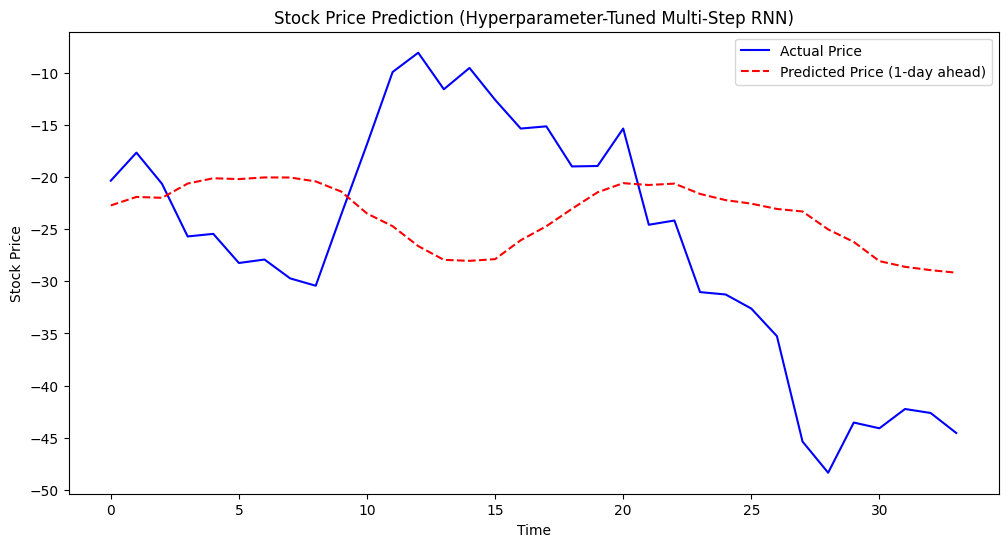


🎯 Hyperparameter-Tuned Multi-Step RNN Model Complete! 🚀


In [ ]:
import numpy as np
import tensorflow as tf
import keras_tuner as kt
import matplotlib.pyplot as plt
import joblib
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler

# === Step 1: Load Preprocessed Data ===
X_train = np.load("X_train.npy")
y_train = np.load("y_train.npy")
X_test = np.load("X_test.npy")
y_test = np.load("y_test.npy")

# Load Scaler
scaler = joblib.load("scaler.pkl")

print(f"✅ Data Loaded: X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"✅ X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

# === Step 2: Create Multi-Step Target ===
FUTURE_STEPS = 3

def create_future_labels(y, future_steps):
    y_future = np.zeros((y.shape[0] - future_steps, future_steps))
    for i in range(y_future.shape[0]):
        y_future[i] = y[i + 1: i + 1 + future_steps].flatten()
    return y_future

y_train_future = create_future_labels(y_train, FUTURE_STEPS)
y_test_future = create_future_labels(y_test, FUTURE_STEPS)
X_train = X_train[:y_train_future.shape[0]]
X_test = X_test[:y_test_future.shape[0]]

print(f"✅ New y_train shape: {y_train_future.shape}, y_test shape: {y_test_future.shape}")

# === Step 3: Define RNN Model for Hyperparameter Tuning ===
def build_rnn_model(hp):
    model = Sequential()

    # First RNN Layer
    model.add(SimpleRNN(
        units=hp.Int('rnn_units_1', min_value=50, max_value=150, step=25),
        return_sequences=True,
        input_shape=(X_train.shape[1], X_train.shape[2])
    ))
    model.add(Dropout(hp.Float('dropout_1', min_value=0.1, max_value=0.4, step=0.1)))

    # Second RNN Layer
    model.add(SimpleRNN(
        units=hp.Int('rnn_units_2', min_value=50, max_value=150, step=25),
        return_sequences=True
    ))
    model.add(Dropout(hp.Float('dropout_2', min_value=0.1, max_value=0.4, step=0.1)))

    # Third RNN Layer
    model.add(SimpleRNN(
        units=hp.Int('rnn_units_3', min_value=50, max_value=150, step=25)
    ))
    model.add(Dropout(hp.Float('dropout_3', min_value=0.1, max_value=0.4, step=0.1)))

    # Fully Connected Layers
    model.add(Dense(units=hp.Int('dense_units', min_value=10, max_value=50, step=10), activation="relu"))
    model.add(Dense(units=FUTURE_STEPS))

    # Compile Model
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', [0.001, 0.0005, 0.0001])),
        loss="mse",
        metrics=["mae"]
    )
    return model

# === Step 4: Initialize Bayesian Hyperparameter Tuner ===
tuner = kt.BayesianOptimization(
    build_rnn_model,
    objective="val_loss",
    max_trials=20,  # Run more trials since multi-step forecasting is harder
    directory="multi_step_rnn_tuning",
    project_name="stock_forecasting"
)

# Perform Hyperparameter Search
tuner.search(X_train, y_train_future, epochs=50, validation_data=(X_test, y_test_future))

# Get Best Hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = tuner.hypermodel.build(best_hps)

# === Step 5: Train the Best Model ===
BATCH_SIZE = 16
history = best_model.fit(
    X_train, y_train_future,
    epochs=100,
    batch_size=BATCH_SIZE,
    validation_data=(X_test, y_test_future),
    verbose=1
)

# === Step 6: Make Multi-Step Predictions ===
predictions = best_model.predict(X_test)

# === Step 7: Reverse Scale Predictions and Actual Values ===
def inverse_transform_multi_feature(scaler, data, feature_index=-1):
    expected_features = scaler.min_.shape[0]
    dummy = np.zeros((data.shape[0], expected_features))
    dummy[:, feature_index] = data.flatten()
    return scaler.inverse_transform(dummy)[:, feature_index]

# Rescale Predictions and Actual Prices
predictions_rescaled = inverse_transform_multi_feature(scaler, predictions[:, 0], feature_index=-1)
y_test_rescaled = inverse_transform_multi_feature(scaler, y_test_future[:, 0], feature_index=-1)

# === Step 8: Plot Multi-Step Predicted vs. Actual Prices ===
plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label="Actual Price", color="blue")
plt.plot(predictions_rescaled, label="Predicted Price (1-day ahead)", color="red", linestyle="dashed")
plt.title("Stock Price Prediction (Hyperparameter-Tuned Multi-Step RNN)")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

print("\n🎯 Hyperparameter-Tuned Multi-Step RNN Model Complete! 🚀")


In [ ]:
#This RNN has hyperparameter tuning, and the one below it doesnt

Trial 10 Complete [00h 00m 37s]
val_loss: 0.0051834851037710905

Best val_loss So Far: 0.0051834851037710905
Total elapsed time: 00h 05m 45s
Results summary
Results in rnn_tuning/stock_prediction_tuned
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 09 summary
Hyperparameters:
rnn_units: 150
dropout_rate: 0.2
rnn_units_2: 125
dropout_rate_2: 0.1
learning_rate: 0.001
Score: 0.0051834851037710905

Trial 05 summary
Hyperparameters:
rnn_units: 75
dropout_rate: 0.1
rnn_units_2: 125
dropout_rate_2: 0.1
learning_rate: 0.0001
Score: 0.006308292504400015

Trial 06 summary
Hyperparameters:
rnn_units: 100
dropout_rate: 0.2
rnn_units_2: 150
dropout_rate_2: 0.1
learning_rate: 0.001
Score: 0.0065882273484021425

Trial 02 summary
Hyperparameters:
rnn_units: 150
dropout_rate: 0.2
rnn_units_2: 150
dropout_rate_2: 0.2
learning_rate: 0.001
Score: 0.007041379809379578

Trial 03 summary
Hyperparameters:
rnn_units: 75
dropout_rate: 0.1
rnn_units_2: 150
dropout_rate_2: 0.05
learning

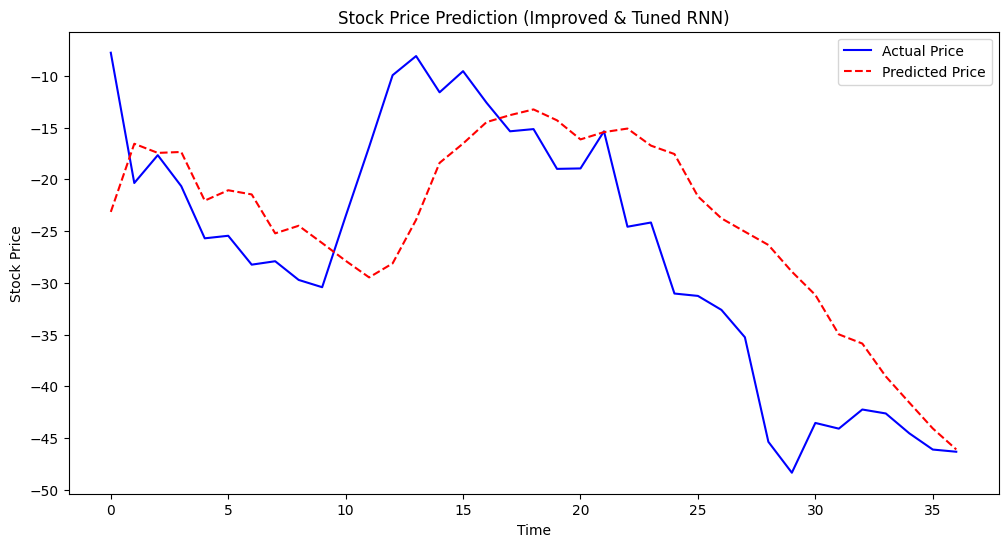


🎯 Hyperparameter-Tuned RNN Model Training & Prediction Complete! 🚀


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import joblib
import json
import os
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler

# === Step 1: Load Preprocessed Data ===
X_train = np.load("X_train.npy")
y_train = np.load("y_train.npy")
X_test = np.load("X_test.npy")
y_test = np.load("y_test.npy")

# Load Scaler
scaler = joblib.load("scaler.pkl")

print(f"✅ Data Loaded: X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"✅ X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

# ✅ Delete existing tuning directory if it exists
if os.path.exists("rnn_tuning/stock_prediction"):
    print("🔄 Removing previous tuner files...")
    os.system("rm -rf rnn_tuning/stock_prediction")  # Deletes previous tuning directory

# === Step 2: Hyperparameter Tuning ===
def build_rnn_model(hp):
    """Builds an improved RNN model with tunable hyperparameters."""
    model = Sequential()

    # First RNN Layer
    model.add(SimpleRNN(
        units=hp.Choice('rnn_units', [75, 100, 125, 150]),  # Increased range
        return_sequences=True,
        input_shape=(X_train.shape[1], X_train.shape[2])
    ))
    model.add(Dropout(hp.Choice('dropout_rate', [0.05, 0.1, 0.2])))

    # Second RNN Layer
    model.add(SimpleRNN(
        units=hp.Choice('rnn_units_2', [75, 100, 125, 150])
    ))
    model.add(Dropout(hp.Choice('dropout_rate_2', [0.05, 0.1, 0.2])))

    # Fully Connected Layers
    model.add(Dense(units=50, activation="relu"))
    model.add(Dense(units=1))

    # Compile Model
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', [0.001, 0.0005, 0.0001])),
        loss="mse",
        metrics=["mae"]
    )

    return model

# ✅ Run More Trials
tuner = kt.RandomSearch(
    build_rnn_model,
    objective="val_loss",
    max_trials=10,  # ⬆️ Ensuring at least 10 different configurations run
    executions_per_trial=2,  # ⬆️ Run each config twice for better stability
    directory="rnn_tuning",
    project_name="stock_prediction_tuned"
)

# ✅ Perform Hyperparameter Search
tuner.search(X_train, y_train, epochs=30, validation_data=(X_test, y_test), verbose=1)

# ✅ Show the summary of the search
tuner.results_summary()

# ✅ Get Best Hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# ✅ Save Best Hyperparameters
best_hps_dict = {param: best_hps.get(param) for param in best_hps.values.keys()}
with open("best_hyperparameters.json", "w") as f:
    json.dump(best_hps_dict, f)
print("✅ Best hyperparameters saved!")

# === Step 3: Train the Best Model with Early Stopping ===
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(
    X_train, y_train,
    epochs=200,  # Train longer with early stopping
    batch_size=16,  # Default batch size
    validation_data=(X_test, y_test),
    callbacks=[early_stop],
    verbose=1
)

# ✅ Save the Best Model
best_model.save("best_rnn_model.keras")
print("✅ Best RNN Model saved!")

# === Step 4: Evaluate the Model ===
loss, mae = best_model.evaluate(X_test, y_test)
print(f"✅ Best Model Test Loss: {loss}")
print(f"✅ Best Model Test MAE: {mae}")

# === Step 5: Make Predictions ===
predictions = best_model.predict(X_test)

# === Step 6: Reverse Scale Predictions and Actual Values ===
def inverse_transform_single_feature(scaler, data, feature_index=-1):
    """
    Properly inverse transforms a single feature using the original scaler.
    Ensures that only the last column (Close Price) is inverse transformed.
    """
    expected_features = scaler.min_.shape[0]
    dummy = np.zeros((data.shape[0], expected_features))
    dummy[:, feature_index] = data.flatten()
    return scaler.inverse_transform(dummy)[:, feature_index]

# ✅ Rescale Predictions and Actual Prices
feature_index = -1
predictions_rescaled = inverse_transform_single_feature(scaler, predictions, feature_index)
y_test_rescaled = inverse_transform_single_feature(scaler, y_test.reshape(-1, 1), feature_index)

# === Step 7: Plot Predicted vs. Actual Prices ===
plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label="Actual Price", color="blue")
plt.plot(predictions_rescaled, label="Predicted Price", color="red", linestyle="dashed")
plt.title("Stock Price Prediction (Improved & Tuned RNN)")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

print("\n🎯 Hyperparameter-Tuned RNN Model Training & Prediction Complete! 🚀")


✅ Data Loaded: X_train shape: (146, 50, 15), y_train shape: (146,)
✅ X_test shape: (37, 50, 15), y_test shape: (37,)
Reloading Tuner from rnn_tuning/stock_prediction/tuner0.json
✅ Best hyperparameters saved!
Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 136ms/step - loss: 1.0250 - mae: 0.7737 - val_loss: 0.0663 - val_mae: 0.2361
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.1245 - mae: 0.2702 - val_loss: 0.0570 - val_mae: 0.2195
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.1122 - mae: 0.2676 - val_loss: 0.0825 - val_mae: 0.2763
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.1047 - mae: 0.2642 - val_loss: 0.0085 - val_mae: 0.0750
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0842 - mae: 0.2240 - val_loss: 0.0198 - val_mae: 0.1137
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0765 - mae: 0.2185 - val_loss: 0.0207 - val_mae: 0.1176
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0536 - mae: 0.1886 - 

✅ Best RNN Model saved!
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0131 - mae: 0.0932
✅ Best Model Test Loss: 0.013931567780673504
✅ Best Model Test MAE: 0.09715227037668228
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step


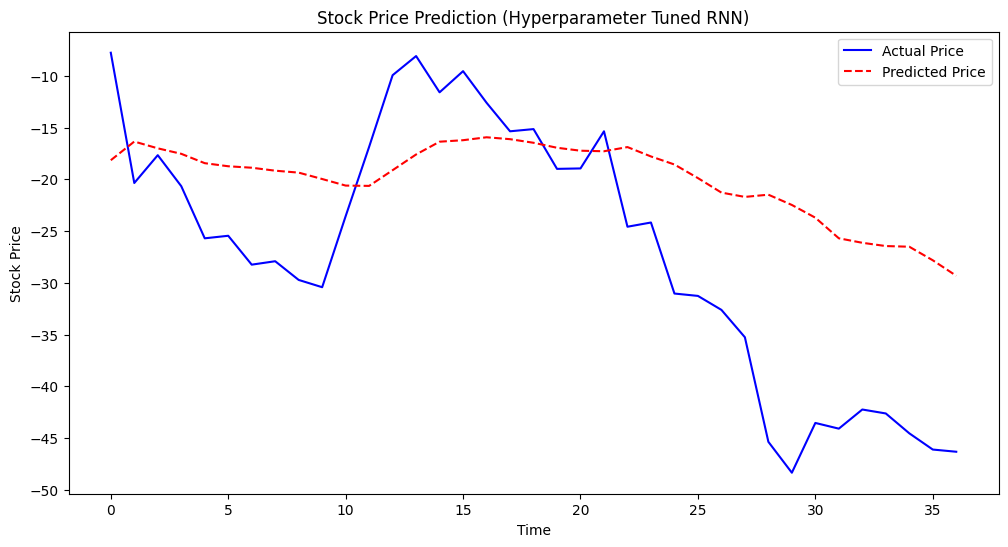


🎯 Hyperparameter-Tuned RNN Model Training & Prediction Complete! 🚀


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import joblib
import json
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler

# === Step 1: Load Preprocessed Data ===
X_train = np.load("X_train.npy")
y_train = np.load("y_train.npy")
X_test = np.load("X_test.npy")
y_test = np.load("y_test.npy")

# Load Scaler
scaler = joblib.load("scaler.pkl")

print(f"✅ Data Loaded: X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"✅ X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

# === Step 2: Hyperparameter Tuning ===
def build_rnn_model(hp):
    """Builds an RNN model with tunable hyperparameters."""
    model = Sequential()

    # First RNN Layer
    model.add(SimpleRNN(
        units=hp.Choice('rnn_units_1', [50, 75, 100]),  # Tune RNN units
        return_sequences=True,
        input_shape=(X_train.shape[1], X_train.shape[2])
    ))
    model.add(Dropout(hp.Choice('dropout_rate_1', [0.1, 0.2, 0.3])))  # Tune dropout

    # Second RNN Layer
    model.add(SimpleRNN(
        units=hp.Choice('rnn_units_2', [50, 75, 100]),
        return_sequences=True
    ))
    model.add(Dropout(hp.Choice('dropout_rate_2', [0.1, 0.2, 0.3])))

    # Third RNN Layer
    model.add(SimpleRNN(units=hp.Choice('rnn_units_3', [50, 75, 100])))
    model.add(Dropout(hp.Choice('dropout_rate_3', [0.1, 0.2, 0.3])))

    # Fully Connected Layers
    model.add(Dense(units=25, activation="relu"))
    model.add(Dense(units=1))  # Output layer (predicting next stock price)

    # Compile Model
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', [0.001, 0.0005, 0.0001])),  # Tune learning rate
        loss="mse",
        metrics=["mae"]
    )
    return model

# Initialize Hyperparameter Tuner
tuner = kt.BayesianOptimization(
    build_rnn_model,
    objective="val_loss",
    max_trials=10,
    directory="rnn_tuning",
    project_name="stock_prediction"
)

# Perform Hyperparameter Search
tuner.search(X_train, y_train, epochs=30, validation_data=(X_test, y_test))

# Get Best Model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = tuner.hypermodel.build(best_hps)

# ✅ Fix the way hyperparameters are saved
best_hps_dict = {param.name: best_hps.get(param.name) for param in best_hps.space}
with open("best_hyperparameters.json", "w") as f:
    json.dump(best_hps_dict, f)
print("✅ Best hyperparameters saved!")

# ✅ FIXED BATCH SIZE ISSUE
BATCH_SIZE = 16  # Set batch size manually

# === Step 3: Train the Best Model ===
history = best_model.fit(
    X_train, y_train,
    epochs=100,  # Train longer now that we have best hyperparameters
    batch_size=BATCH_SIZE,
    validation_data=(X_test, y_test),
    verbose=1
)

# Save the Best Model
best_model.save("best_rnn_model.h5")
print("✅ Best RNN Model saved!")

# === Step 4: Evaluate the Model ===
loss, mae = best_model.evaluate(X_test, y_test)
print(f"✅ Best Model Test Loss: {loss}")
print(f"✅ Best Model Test MAE: {mae}")

# === Step 5: Make Predictions ===
predictions = best_model.predict(X_test)

# === Step 6: Reverse Scale Predictions and Actual Values ===
def inverse_transform_single_feature(scaler, data, feature_index=-1):
    """
    Properly inverse transforms a single feature using the original scaler.
    Ensures that only the last column (Close Price) is inverse transformed.
    """
    expected_features = scaler.min_.shape[0]  # Get expected feature count from scaler
    dummy = np.zeros((data.shape[0], expected_features))  # Create dummy array with correct feature count
    dummy[:, feature_index] = data.flatten()  # Place predictions in the correct column
    return scaler.inverse_transform(dummy)[:, feature_index]  # Apply inverse transform

# Rescale Predictions and Actual Prices
feature_index = -1  # Assuming Close Price was the last column in scaling
predictions_rescaled = inverse_transform_single_feature(scaler, predictions, feature_index)
y_test_rescaled = inverse_transform_single_feature(scaler, y_test.reshape(-1, 1), feature_index)

# === Step 7: Plot Predicted vs. Actual Prices ===
plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label="Actual Price", color="blue")
plt.plot(predictions_rescaled, label="Predicted Price", color="red", linestyle="dashed")
plt.title("Stock Price Prediction (Hyperparameter Tuned RNN)")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

print("\n🎯 Hyperparameter-Tuned RNN Model Training & Prediction Complete! 🚀")


CNN TEST

✅ Data Loaded: X_train shape: (146, 50, 15), y_train shape: (146,)
✅ X_test shape: (37, 50, 15), y_test shape: (37,)
Reloading Tuner from cnn_tuning/stock_prediction_tuned/tuner0.json
Results summary
Results in cnn_tuning/stock_prediction_tuned
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 08 summary
Hyperparameters:
filters_1: 64
kernel_size_1: 7
dropout_rate_1: 0.1
filters_2: 16
kernel_size_2: 7
dropout_rate_2: 0.3
dense_units: 128
dropout_rate_dense: 0.3
learning_rate: 0.0005
Score: 0.017163405194878578

Trial 05 summary
Hyperparameters:
filters_1: 16
kernel_size_1: 3
dropout_rate_1: 0.2
filters_2: 64
kernel_size_2: 7
dropout_rate_2: 0.3
dense_units: 128
dropout_rate_dense: 0.1
learning_rate: 0.0001
Score: 0.02153283031657338

Trial 01 summary
Hyperparameters:
filters_1: 64
kernel_size_1: 3
dropout_rate_1: 0.2
filters_2: 32
kernel_size_2: 3
dropout_rate_2: 0.2
dense_units: 64
dropout_rate_dense: 0.3
learning_rate: 0.001
Score: 0.022870216518640518

Trial 

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.1217 - mae: 0.2861 - val_loss: 0.1290 - val_mae: 0.3373
Epoch 2/250
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0731 - mae: 0.2146 - val_loss: 0.1172 - val_mae: 0.3202
Epoch 3/250
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0609 - mae: 0.2010 - val_loss: 0.0987 - val_mae: 0.2902
Epoch 4/250
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0472 - mae: 0.1691 - val_loss: 0.0506 - val_mae: 0.1912
Epoch 5/250
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0459 - mae: 0.1695 - val_loss: 0.1064 - val_mae: 0.3061
Epoch 6/250
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0318 - mae: 0.1463 - val_loss: 0.1059 - val_mae: 0.3066
Epoch 7/250
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0346 - mae: 0.1549 - val_loss: 0.1052 - val_mae: 0.3076
Epoch 8/250
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0376 - mae: 0.1517 - val_loss: 0.1750 - val_mae: 0.4055
Epoch 9/250
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0259 -

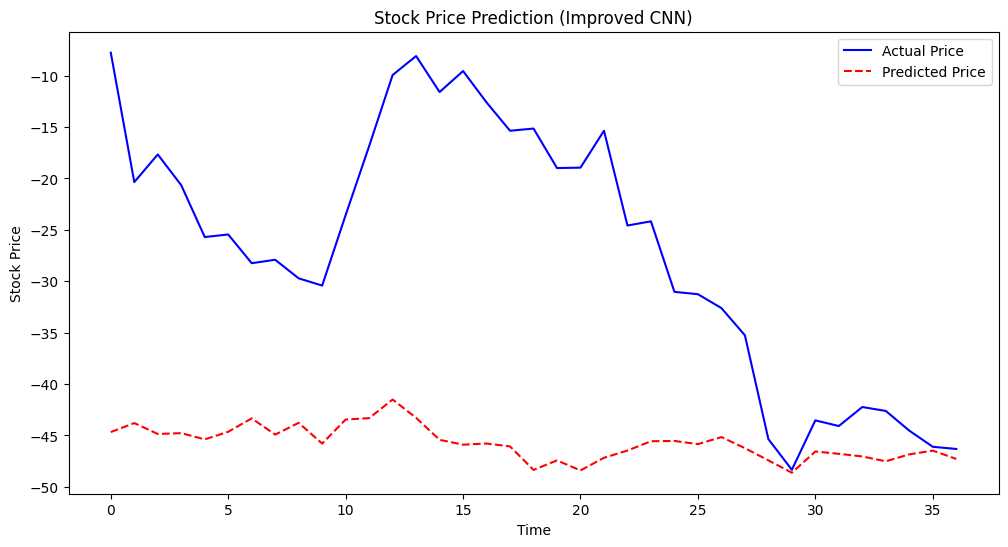


🎯 Improved CNN Model Training & Prediction Complete! 🚀


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import joblib
import json
import os
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Dropout, Flatten, MaxPooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler

# === Step 1: Load Preprocessed Data ===
X_train = np.load("X_train.npy")
y_train = np.load("y_train.npy")
X_test = np.load("X_test.npy")
y_test = np.load("y_test.npy")

# Load Scaler
scaler = joblib.load("scaler.pkl")

print(f"✅ Data Loaded: X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"✅ X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

# ✅ Delete existing tuning directory if it exists
if os.path.exists("cnn_tuning/stock_prediction"):
    print("🔄 Removing previous tuner files...")
    os.system("rm -rf cnn_tuning/stock_prediction")  # Deletes previous tuning directory

# === Step 2: Hyperparameter Tuning ===
def build_cnn_model(hp):
    """Builds an improved CNN model with tunable hyperparameters."""
    model = Sequential()

    # First Convolutional Layer (Feature Extraction)
    model.add(Conv1D(
        filters=hp.Choice('filters_1', [32, 64, 128]),  # Increased range
        kernel_size=hp.Choice('kernel_size_1', [3, 5, 7]),
        activation='relu',
        input_shape=(X_train.shape[1], X_train.shape[2])
    ))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(hp.Choice('dropout_rate_1', [0.1, 0.2])))

    # Second Convolutional Layer
    model.add(Conv1D(
        filters=hp.Choice('filters_2', [32, 64, 128]),
        kernel_size=hp.Choice('kernel_size_2', [3, 5, 7]),
        activation='relu'
    ))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(hp.Choice('dropout_rate_2', [0.1, 0.2])))

    # Third Convolutional Layer (Deeper Representation)
    model.add(Conv1D(
        filters=hp.Choice('filters_3', [32, 64, 128]),
        kernel_size=hp.Choice('kernel_size_3', [3, 5]),
        activation='relu'
    ))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(hp.Choice('dropout_rate_3', [0.1, 0.2])))

    # Flatten for Dense Layers
    model.add(Flatten())

    # Dense Layers
    model.add(Dense(units=hp.Choice('dense_units_1', [64, 128, 256]), activation="relu"))
    model.add(Dropout(hp.Choice('dropout_rate_dense', [0.1, 0.2])))

    # Output Layer
    model.add(Dense(units=1))

    # Compile Model
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', [0.001, 0.0005, 0.0001])),
        loss="mse",
        metrics=["mae"]
    )

    return model

# ✅ Run More Trials
tuner = kt.RandomSearch(
    build_cnn_model,
    objective="val_loss",
    max_trials=15,  # More trials for better tuning
    executions_per_trial=2,  # Run each config twice for better stability
    directory="cnn_tuning",
    project_name="stock_prediction_tuned"
)

# ✅ Perform Hyperparameter Search
tuner.search(X_train, y_train, epochs=40, validation_data=(X_test, y_test), verbose=1)

# ✅ Show the summary of the search
tuner.results_summary()

# ✅ Get Best Hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# ✅ Save Best Hyperparameters
best_hps_dict = {param: best_hps.get(param) for param in best_hps.values.keys()}
with open("best_hyperparameters.json", "w") as f:
    json.dump(best_hps_dict, f)
print("✅ Best hyperparameters saved!")

# === Step 3: Train the Best Model with Early Stopping ===
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(
    X_train, y_train,
    epochs=250,  # Train longer with early stopping
    batch_size=16,  # Default batch size
    validation_data=(X_test, y_test),
    callbacks=[early_stop],
    verbose=1
)

# ✅ Save the Best Model
best_model.save("best_cnn_model.keras")
print("✅ Best CNN Model saved!")

# === Step 4: Evaluate the Model ===
loss, mae = best_model.evaluate(X_test, y_test)
print(f"✅ Best Model Test Loss: {loss}")
print(f"✅ Best Model Test MAE: {mae}")

# === Step 5: Make Predictions ===
predictions = best_model.predict(X_test)

# === Step 6: Reverse Scale Predictions and Actual Values ===
def inverse_transform_single_feature(scaler, data, feature_index=-1):
    """
    Properly inverse transforms a single feature using the original scaler.
    Ensures that only the last column (Close Price) is inverse transformed.
    """
    expected_features = scaler.min_.shape[0]
    dummy = np.zeros((data.shape[0], expected_features))
    dummy[:, feature_index] = data.flatten()
    return scaler.inverse_transform(dummy)[:, feature_index]

# ✅ Rescale Predictions and Actual Prices
feature_index = -1
predictions_rescaled = inverse_transform_single_feature(scaler, predictions, feature_index)
y_test_rescaled = inverse_transform_single_feature(scaler, y_test.reshape(-1, 1), feature_index)

# === Step 7: Plot Predicted vs. Actual Prices ===
plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label="Actual Price", color="blue")
plt.plot(predictions_rescaled, label="Predicted Price", color="red", linestyle="dashed")
plt.title("Stock Price Prediction (Improved CNN)")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

print("\n🎯 Improved CNN Model Training & Prediction Complete! 🚀")


In [ ]:
#Arima model test

In [ ]:
#LSTM test

Trial 10 Complete [00h 01m 03s]
val_loss: 0.00792448758147657

Best val_loss So Far: 0.004126881714910269
Total elapsed time: 00h 10m 46s
Results summary
Results in ensemble_tuning/stock_prediction_ensemble
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 04 summary
Hyperparameters:
cnn_filters: 64
rnn_units: 100
rnn_units_2: 100
lstm_units: 50
lstm_units_2: 100
dropout_rate: 0.2
learning_rate: 0.0005
Score: 0.004126881714910269

Trial 03 summary
Hyperparameters:
cnn_filters: 64
rnn_units: 75
rnn_units_2: 50
lstm_units: 75
lstm_units_2: 75
dropout_rate: 0.1
learning_rate: 0.001
Score: 0.005385397467762232

Trial 07 summary
Hyperparameters:
cnn_filters: 128
rnn_units: 75
rnn_units_2: 100
lstm_units: 50
lstm_units_2: 50
dropout_rate: 0.1
learning_rate: 0.0005
Score: 0.005943761207163334

Trial 08 summary
Hyperparameters:
cnn_filters: 64
rnn_units: 75
rnn_units_2: 75
lstm_units: 100
lstm_units_2: 75
dropout_rate: 0.1
learning_rate: 0.0005
Score: 0.0075133712962269

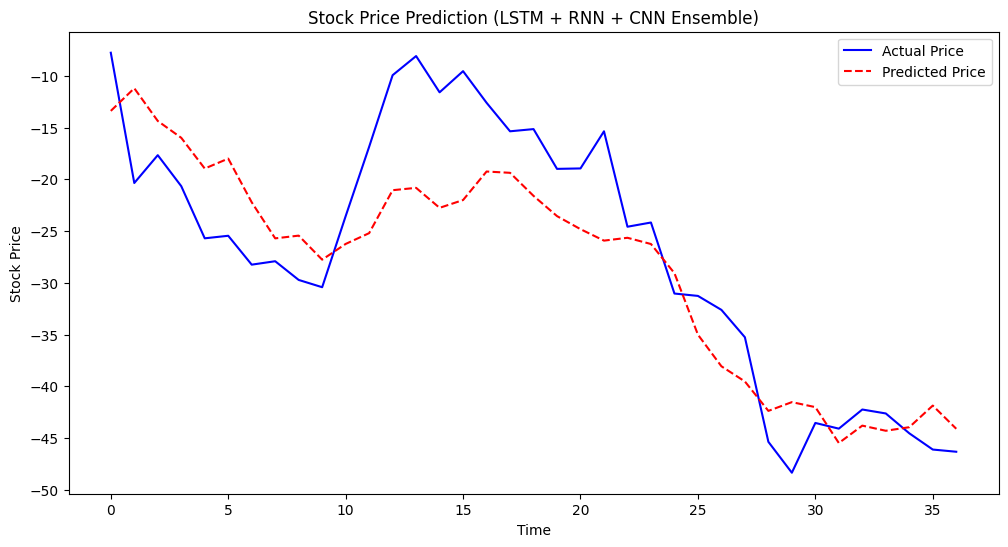


🎯 Ensemble Model Training & Prediction Complete! 🚀


In [ ]:
#Ensemble model test with LSTM RNN and CNN
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import joblib
import json
import os
import keras_tuner as kt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, SimpleRNN, LSTM, Conv1D, Dense, Dropout, Flatten, Concatenate, MaxPooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler

# === Step 1: Load Preprocessed Data ===
X_train = np.load("X_train.npy")
y_train = np.load("y_train.npy")
X_test = np.load("X_test.npy")
y_test = np.load("y_test.npy")

# Load Scaler
scaler = joblib.load("scaler.pkl")

print(f"✅ Data Loaded: X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"✅ X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

# ✅ Remove previous tuning directory if needed
if os.path.exists("ensemble_tuning/stock_prediction"):
    print("🔄 Removing previous tuner files...")
    os.system("rm -rf ensemble_tuning/stock_prediction")

# === Step 2: Hyperparameter Tuning ===
def build_ensemble_model(hp):
    """Builds an ensemble model with CNN, RNN, and LSTM."""
    inputs = Input(shape=(X_train.shape[1], X_train.shape[2]))

    # CNN Branch
    cnn = Conv1D(filters=hp.Choice('cnn_filters', [32, 64, 128]), kernel_size=3, activation='relu')(inputs)
    cnn = MaxPooling1D(pool_size=2)(cnn)
    cnn = Flatten()(cnn)

    # RNN Branch
    rnn = SimpleRNN(units=hp.Choice('rnn_units', [50, 75, 100]), return_sequences=True)(inputs)
    rnn = SimpleRNN(units=hp.Choice('rnn_units_2', [50, 75, 100]))(rnn)

    # LSTM Branch
    lstm = LSTM(units=hp.Choice('lstm_units', [50, 75, 100]), return_sequences=True)(inputs)
    lstm = LSTM(units=hp.Choice('lstm_units_2', [50, 75, 100]))(lstm)

    # Merge all branches
    merged = Concatenate()([cnn, rnn, lstm])
    merged = Dense(50, activation="relu")(merged)
    merged = Dropout(hp.Choice('dropout_rate', [0.1, 0.2, 0.3]))(merged)

    # Output Layer
    output = Dense(1)(merged)

    # Compile Model
    model = Model(inputs, output)
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', [0.001, 0.0005, 0.0001])),
        loss="mse",
        metrics=["mae"]
    )
    return model

# ✅ Run Hyperparameter Tuning
tuner = kt.RandomSearch(
    build_ensemble_model,
    objective="val_loss",
    max_trials=10,
    executions_per_trial=2,
    directory="ensemble_tuning",
    project_name="stock_prediction_ensemble"
)

tuner.search(X_train, y_train, epochs=30, validation_data=(X_test, y_test), verbose=1)

tuner.results_summary()

# ✅ Get Best Hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# ✅ Save Best Hyperparameters
best_hps_dict = {param: best_hps.get(param) for param in best_hps.values.keys()}
with open("best_hyperparameters_ensemble.json", "w") as f:
    json.dump(best_hps_dict, f)
print("✅ Best hyperparameters saved!")

# === Step 3: Train the Best Model ===
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=16,
    validation_data=(X_test, y_test),
    callbacks=[early_stop],
    verbose=1
)

# ✅ Save the Best Model
best_model.save("best_ensemble_model.keras")
print("✅ Best Ensemble Model saved!")

# === Step 4: Evaluate the Model ===
loss, mae = best_model.evaluate(X_test, y_test)
print(f"✅ Best Model Test Loss: {loss}")
print(f"✅ Best Model Test MAE: {mae}")

# === Step 5: Make Predictions ===
predictions = best_model.predict(X_test)

# === Step 6: Reverse Scale Predictions and Actual Values ===
def inverse_transform_single_feature(scaler, data, feature_index=-1):
    expected_features = scaler.min_.shape[0]
    dummy = np.zeros((data.shape[0], expected_features))
    dummy[:, feature_index] = data.flatten()
    return scaler.inverse_transform(dummy)[:, feature_index]

feature_index = -1
predictions_rescaled = inverse_transform_single_feature(scaler, predictions, feature_index)
y_test_rescaled = inverse_transform_single_feature(scaler, y_test.reshape(-1, 1), feature_index)

# === Step 7: Plot Predicted vs. Actual Prices ===
plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label="Actual Price", color="blue")
plt.plot(predictions_rescaled, label="Predicted Price", color="red", linestyle="dashed")
plt.title("Stock Price Prediction (LSTM + RNN + CNN Ensemble)")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

print("\n🎯 Ensemble Model Training & Prediction Complete! 🚀")
